In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

# AQ2 #

## 1. Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail. ## 

In [12]:
# recursive algorithm
def cut_one(n):
    # base cases,
    if n <=1 :
        return 0
    # setting the max value to 0, cutting 
    # and update it with the new maximum value
    mval = 0
    for i in range(1,n):
        mval = max(mval, i*(n-i), cut_one(n-i)*i)
    return mval

We respected the three rules because every piece of the cut always has an integer length; with the base cases we also checked that that there is at least one cut; we used every time the function max to take the maximum possible. 

Algorithm behaviour:
We assumed that n is a length and for this reason it is a number at least equal to zero. Every time the length of the ribbon becomes 0 or 1 we return the 0 value which will have passed inside the function max to do che checking with other values. We need to initialize a variable called mval that will contain for every iteration the new maximum value. Mixing the for loop and the recursion we are able to compute all the combinations of the pieces and to store, as last one number, the maximum value possibile, based on the multiplication of the length of all pieces.

## 2. Show that the algorithm has exponential running time. ##

In [ ]:
???????

## 3. Now provide a polynomial solution, based on dynamic programming, and compute its running-time complexity. ##

In [13]:
# Polynomial solution based on dinamic programming
def cut_two(n):
    arr= [0 for i in range(n+1)]

# the last value of the array that we are building will be our solution
# the maximum product of the length of the cuts
    for i in range(1,n+1):
        mval = 0;
        for j in range(1,i):
                mval = max(mval, (i-j)*j, j*arr[i-j])
        arr[i] = mval
    return arr[n]


In [ ]:
??????????

## 4. Evaluate the running time of your algorithm for the sizes (Ns) in the range of [2, 25], plot the results, and interpret it (if you have implemented two algorithms, please include both in the plot and compare them). ##

In [4]:
time1 = []
time2 = []


In [5]:
for i in range(2,26):
    time_start = time.time()
    cut_one(i)
    time_end = time.time()
    time1.append(time_end -  time_start)
    
    time_start = time.time()
    cut_two(i)
    time_end = time.time()
    time2.append(time_end - time_start)

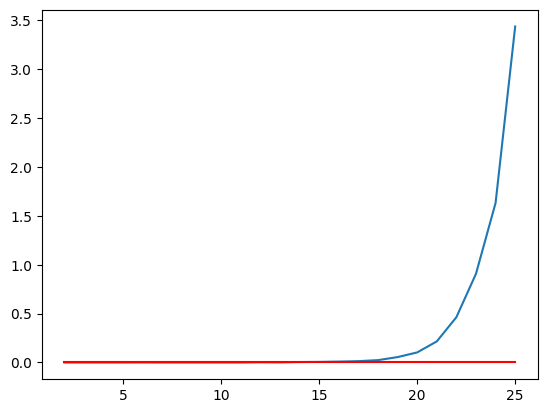

In [8]:
plt.plot(np.arange(2,26), time1)
plt.plot(np.arange(2,26), time2, color = 'red')

As can be seen, the first algorithm has an higher running time than the second for bigger values of n and his exponential trend seems to be confirmed. On the other hand, the second solution has a polynomial complexity, but in the range [2,25] of n, for my pc the running time is always 0.0.  

## 5. (Optional, mini bonus) Is the algorithm of question 3 optimal? If you belive it, can you prove it? If not, can you find a faster algorithm? In case you found a faster algorithm implement it and explain your algorithm in detail. ##

In [14]:
def cut_three(n):
    if n <= 1:
        return 0
    elif n == 2:
        return 1
    elif n == 3:
        return 2
    prod = 1
    while n > 4:
        n = n - 3
        prod = prod * 3
    prod = prod * n
    return prod


In [16]:
cut_three(4)

4

In [17]:
cut_two(4)

4

There is a pattern that can be recognised,the maximum product among the length of the cuts, is calculated repeatedly cutting parts of length 3 while length is greater than 4. The size 0 and 1 are managed by the first if, the size 2 by the second and the size 3 by the third. Moreover, the size 4 is managed with only the use of prod = prod*n(where n is equal to 4 and prod is equal to 1).